/var/folders/sr/qhk7scps7xl0d51nr8bq0r9h0000gn/T/ipykernel_88402/3603223193.py:73: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


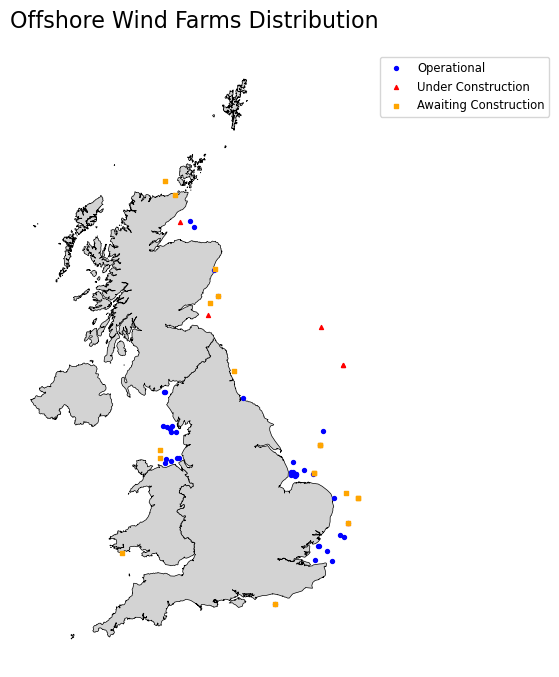

In [56]:
#OFFSHORE WINDFARM 

import xarray as xr #
import rioxarray 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import hvplot.xarray  
import geopandas as gpd # ADDED - was missing from your imports but needed

#Download the info first 
Path_Boundary="/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/UK boundary.geojson"
Path_windfarms_CSV= "/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/Renewable plan .csv"

Program_CRS = "EPSG:27700" 

#UK boundary 
UK_boundary = gpd.read_file(Path_Boundary).to_crs(Program_CRS)

#deal with wind farm position 
Assets_UK = pd.read_csv(Path_windfarms_CSV, encoding='latin-1')

Assets_UK = Assets_UK[pd.to_numeric(Assets_UK['Installed Capacity (MWelec)'], errors='coerce') >= 50.00]


Wind_generation= Assets_UK[Assets_UK['Technology Type']=='Wind Offshore']
Wind_generation = gpd.GeoDataFrame(Wind_generation,geometry=gpd.points_from_xy(Wind_generation['X-coordinate'], Wind_generation['Y-coordinate']),crs=Program_CRS)
#Wind_Generation is now a geojson file 

Wind_installed = Wind_generation[Wind_generation['Development Status (short)']=='Operational']
Wind_under_construction = Wind_generation[Wind_generation['Development Status (short)'] == 'Under Construction']
Wind_awaiting_construction = Wind_generation[Wind_generation['Development Status (short)'] == 'Awaiting Construction']



#start the plot
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_aspect('equal') # Use equal aspect for a correct-looking map

UK_boundary.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    linewidth=0.5,
    label='UK Boundary')


Wind_installed.plot(
    ax=ax,
    marker='o',     
    color='blue',
    markersize=8,
    label='Operational')

# 2. Plot UNDER CONSTRUCTION
Wind_under_construction.plot(
    ax=ax,
    marker='^',     
    color='red',
    markersize=8,
    label='Under Construction') # Changed label

# 3. ADDED: Plot AWAITING CONSTRUCTION
Wind_awaiting_construction.plot(
    ax=ax,
    marker='s',     # New marker (square)
    color='orange', # New color
    markersize=8,
    label='Awaiting Construction') # New label

ax.set_title('Offshore Wind Farms Distribution', fontsize=16) # Title updated
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
ax.set_axis_off()
plt.show()

/var/folders/sr/qhk7scps7xl0d51nr8bq0r9h0000gn/T/ipykernel_88402/140655631.py:73: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


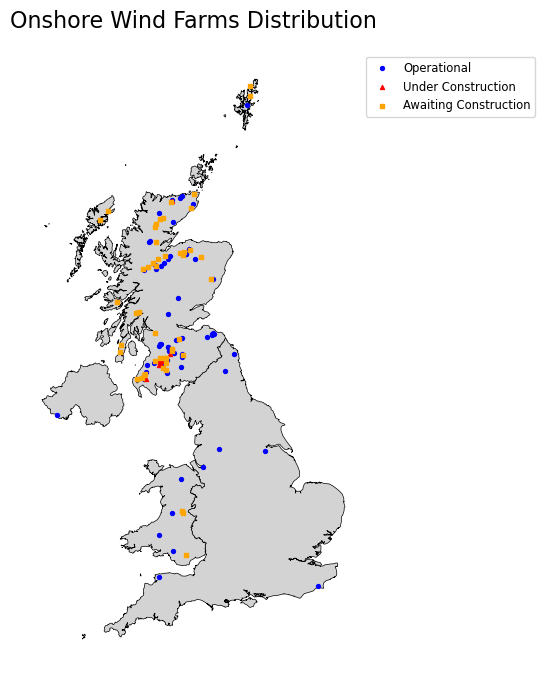

In [57]:
#OFFSHORE WINDFARM 

import xarray as xr #
import rioxarray 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import hvplot.xarray  
import geopandas as gpd # ADDED - was missing from your imports but needed

#Download the info first 
Path_Boundary="/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/UK boundary.geojson"
Path_windfarms_CSV= "/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/Renewable plan .csv"

Program_CRS = "EPSG:27700" 

#UK boundary 
UK_boundary = gpd.read_file(Path_Boundary).to_crs(Program_CRS)

#deal with wind farm position 
Assets_UK = pd.read_csv(Path_windfarms_CSV, encoding='latin-1')

Assets_UK = Assets_UK[pd.to_numeric(Assets_UK['Installed Capacity (MWelec)'], errors='coerce') >= 50.00]


Wind_generation= Assets_UK[Assets_UK['Technology Type']=='Wind Onshore']
Wind_generation = gpd.GeoDataFrame(Wind_generation,geometry=gpd.points_from_xy(Wind_generation['X-coordinate'], Wind_generation['Y-coordinate']),crs=Program_CRS)
#Wind_Generation is now a geojson file 

Wind_installed = Wind_generation[Wind_generation['Development Status (short)']=='Operational']
Wind_under_construction = Wind_generation[Wind_generation['Development Status (short)'] == 'Under Construction']
Wind_awaiting_construction = Wind_generation[Wind_generation['Development Status (short)'] == 'Awaiting Construction']



#start the plot
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_aspect('equal') # Use equal aspect for a correct-looking map

UK_boundary.plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    linewidth=0.5,
    label='UK Boundary')


Wind_installed.plot(
    ax=ax,
    marker='o',     
    color='blue',
    markersize=8,
    label='Operational')

# 2. Plot UNDER CONSTRUCTION
Wind_under_construction.plot(
    ax=ax,
    marker='^',     
    color='red',
    markersize=8,
    label='Under Construction') # Changed label

# 3. ADDED: Plot AWAITING CONSTRUCTION
Wind_awaiting_construction.plot(
    ax=ax,
    marker='s',     # New marker (square)
    color='orange', # New color
    markersize=8,
    label='Awaiting Construction') # New label

ax.set_title('Onshore Wind Farms Distribution', fontsize=16) # Title updated
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
ax.set_axis_off()
plt.show()

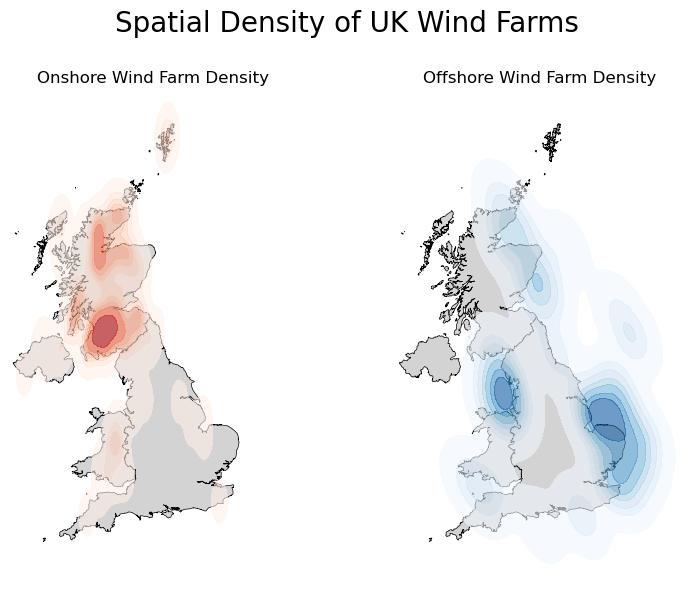

In [54]:
######KDE for both onshore and offshore#### 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

Program_CRS = "EPSG:27700"
Path_Boundary="/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/UK boundary.geojson"
Path_windfarms_CSV= "/Users/chuaguangwei/Desktop/UCL /UCL - Rey/BEVN 93/Assignment 2/MY DATA/Renewable plan .csv"

UK_boundary = gpd.read_file(Path_Boundary).to_crs(Program_CRS)
Assets_UK = pd.read_csv(Path_windfarms_CSV, encoding='latin-1')
Assets_UK = Assets_UK[pd.to_numeric(Assets_UK['Installed Capacity (MWelec)'], errors='coerce') >= 50.00]
onshore_gdf = Assets_UK[Assets_UK['Technology Type']=='Wind Onshore']
onshore_gdf = gpd.GeoDataFrame(
    onshore_gdf,
    geometry=gpd.points_from_xy(onshore_gdf['X-coordinate'], onshore_gdf['Y-coordinate']),
    crs=Program_CRS
).dropna(subset=['geometry']) 

offshore_gdf = Assets_UK[Assets_UK['Technology Type']=='Wind Offshore']
offshore_gdf = gpd.GeoDataFrame(
    offshore_gdf,
    geometry=gpd.points_from_xy(offshore_gdf['X-coordinate'], offshore_gdf['Y-coordinate']),
    crs=Program_CRS
).dropna(subset=['geometry'])
#Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle('Spatial Density of UK Wind Farms', fontsize=20)

#1st one
ax1.set_title('Onshore Wind Farm Density')
UK_boundary.plot(ax=ax1, color='lightgray', edgecolor='black', linewidth=0.5, zorder=1)

sns.kdeplot(
    x=onshore_gdf.geometry.x,
    y=onshore_gdf.geometry.y,
    ax=ax1,
    fill=True,
    cmap="Reds", 
    alpha=0.6,
    zorder=2, 
    levels=8,         
    thresh=0.01,      
    bw_adjust=0.5    
)
ax1.set_aspect('equal')
ax1.set_axis_off()

# 2nd one 
ax2.set_title('Offshore Wind Farm Density')
UK_boundary.plot(ax=ax2, color='lightgray', edgecolor='black', linewidth=0.5, zorder=1)

sns.kdeplot(
    x=offshore_gdf.geometry.x,
    y=offshore_gdf.geometry.y,
    ax=ax2,
    fill=True,
    cmap="Blues", 
    alpha=0.6,
    zorder=2,
    levels=8,         
    thresh=0.01,     
    bw_adjust=0.5   
)
ax2.set_aspect('equal')
ax2.set_axis_off()

plt.tight_layout()
plt.show()